# **Forecasting Air Quality**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm




# **Load Dataset**

In [4]:
#load dataset
aq = pd.read_csv("/content/aqi.csv")

# Exploring the **Dataset**

In [5]:
aq.head(3)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [6]:
aq.shape

(235785, 9)

In [7]:
#Data variables
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [8]:
#formating the date to actual date and time datatype
aq["date"] = pd.to_datetime(aq["date"], format='%d-%m-%Y', errors="coerce")



In [9]:
aq.drop(columns=["unit", "note"], inplace = True )

In [10]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           235785 non-null  datetime64[ns]
 1   state                          235785 non-null  object        
 2   area                           235785 non-null  object        
 3   number_of_monitoring_stations  235785 non-null  int64         
 4   prominent_pollutants           235785 non-null  object        
 5   aqi_value                      235785 non-null  int64         
 6   air_quality_status             235785 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 12.6+ MB


In [11]:
aq["prominent_pollutants"].unique()

array(['PM10', 'CO', 'O3', 'PM2.5', 'SO2', 'PM2.5,PM10', 'PM10,NO2',
       'PM10,O3', 'O3,PM2.5,PM10', 'PM10,O3,CO', 'PM10,CO', 'PM2.5,O3',
       'PM10,SO2', 'PM2.5,CO,O3', 'NO2', 'PM10,PM2.5,NO2', 'CO,O3',
       'PM2.5,PM10,CO', 'PM2.5,SO2,O3', 'PM10,NO2,O3', 'SO2,O3',
       'PM10,NH3,CO', 'PM10,NO2,PM2.5,O3', 'NO2,PM10,CO', 'CO,SO2',
       'PM2.5,NO2', 'PM10,CO,SO2', 'PM2.5,NO2,SO2', 'PM10,SO2,O3',
       'PM10,NO2,SO3', 'PM2.5,NH3,O3', 'PM10,PM2.5,SO2', 'NO2,O3',
       'PM2.5,SO2', 'CO,NO2', 'NH3', 'PM2.5,CO,NO2', 'PM2.5,NH3',
       'NO2,SO2', 'PM2.5,CO,SO2', 'SO3,CO,O3', 'NO2,CO,O3', 'NO2,SO2,CO',
       'NO2,O3,SO2', 'PM10,NH3', 'NH3,CO,O3', 'PM10,NH3,O3', 'O3,NH3',
       'PM2.5,NH3,CO'], dtype=object)

In [12]:
#number of state
aq["state"].nunique()

32

In [13]:
#states
aq["state"].unique()

array(['Maharashtra', 'Bihar', 'Madhya Pradesh', 'Chhattisgarh', 'Assam',
       'Manipur', 'Kerala', 'West Bengal', 'Odisha', 'Karnataka',
       'Gujarat', 'Uttarakhand', 'Tamil Nadu', 'Andhra Pradesh',
       'Rajasthan', 'Uttar Pradesh', 'Punjab', 'Mizoram', 'Chandigarh',
       'Telangana', 'Puducherry', 'Meghalaya', 'Himachal Pradesh',
       'Jharkhand', 'Haryana', 'Arunachal Pradesh', 'Nagaland', 'Tripura',
       'Delhi', 'Andaman and Nicobar Islands', 'Sikkim',
       'Jammu and Kashmir'], dtype=object)

In [14]:
aq["state"].value_counts()

,count
state,
Rajasthan,26585
Karnataka,23494
Maharashtra,22459
Haryana,21706
Uttar Pradesh,21609
Bihar,21553
Madhya Pradesh,15477
Tamil Nadu,11954
Odisha,11099


Rajasthan been the state with the highest result

In [15]:
rajas_data = aq[aq["state"] == "Rajasthan"]

# Count pollutants in Rajasthan
pollutant_counts = rajas_data["prominent_pollutants"].value_counts()
print(pollutant_counts.head(10))

prominent_pollutants
PM10             15449
PM2.5             5848
O3                3225
PM2.5,PM10         738
CO                 382
PM10,O3            370
NO2                160
PM2.5,O3           144
O3,PM2.5,PM10      101
PM10,CO             42
Name: count, dtype: int64


Rajasthan been the state with the highest result and PM10 been it highest pollutants as such the datset will be reduced to that

In [16]:
raj_pm10 = aq[(aq["state"] == "Rajasthan") & (aq["prominent_pollutants"] == "PM10")]

In [17]:
raj_pm10.head(3)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status
28,2025-04-30,Rajasthan,Dungarpur,1,PM10,111,Moderate
35,2025-04-30,Rajasthan,Nagaur,1,PM10,210,Poor
41,2025-04-30,Rajasthan,Jodhpur,5,PM10,124,Moderate


In [18]:
raj_pm10.shape

(15449, 7)

In [19]:
raj_pm10.drop(columns=["area","number_of_monitoring_stations","state","prominent_pollutants","air_quality_status"], inplace= True)

/tmp/ipython-input-241719931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raj_pm10.drop(columns=["area","number_of_monitoring_stations","state","prominent_pollutants","air_quality_status"], inplace= True)


In [20]:
raj_pm10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15449 entries, 28 to 235712
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       15449 non-null  datetime64[ns]
 1   aqi_value  15449 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 362.1 KB


In [21]:
raj_pm10["date"].nunique()

1117

In [22]:
# Set date as index
raj_pm10.set_index("date", inplace=True)

In [23]:
raj_pm10.head(3)

,aqi_value
date,
2025-04-30,111
2025-04-30,210
2025-04-30,124


In [24]:
# Resample to daily mean (since multiple readings may exist per day)
raj_pm10_daily = raj_pm10["aqi_value"].resample("D").mean()
# Fill missing days (if any) using forward fill
raj_pm10_daily = raj_pm10_daily.fillna(method="ffill")

/tmp/ipython-input-901330804.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raj_pm10_daily = raj_pm10_daily.fillna(method="ffill")


In [25]:
raj_pm10_daily.shape

(1126,)

In [26]:
raj_pm10_daily.head(5)

,aqi_value
date,
2022-04-01,102.000000
2022-04-02,142.000000
2022-04-03,124.333333
2022-04-04,107.666667
2022-04-05,100.500000


In [27]:
# Check for missing value
raj_pm10_daily.isnull().sum()


np.int64(0)

In [28]:
# Check for stationarity (ADF test)
result = adfuller(raj_pm10_daily)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -3.463341896131816
p-value: 0.008980000201038686


Therefor the series is already stationary with p-values < 0.05

<Figure size 1200x500 with 0 Axes>

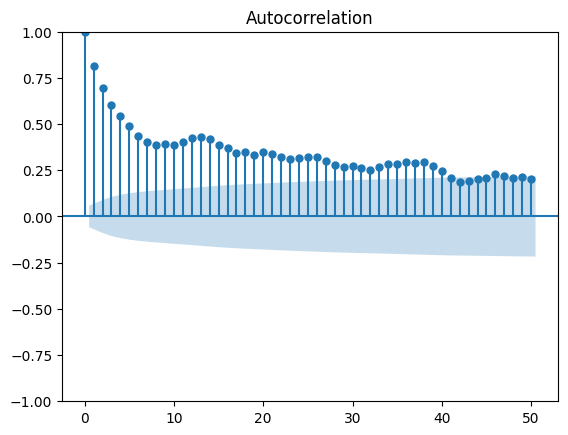

In [29]:
#plot ACF
plt.figure(figsize=(12,5))
plot_acf(raj_pm10_daily, lags=50)
plt.show()

<Figure size 1200x500 with 0 Axes>

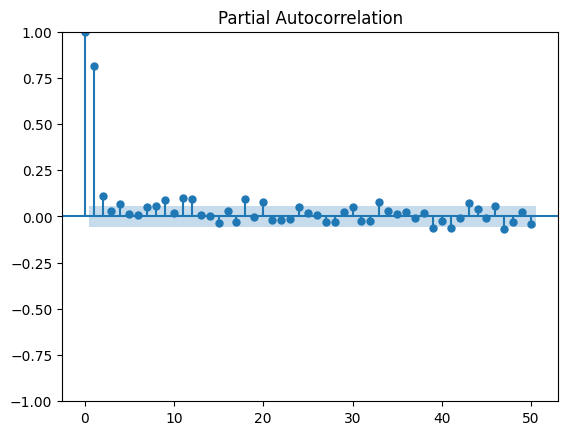

In [30]:
# plot PACF
plt.figure(figsize=(12,5))
plot_pacf(raj_pm10_daily, lags=50)
plt.show()


**An ARIMA(p, d, q) model has three parameters:**

**p** (AR order): How many past values of the series are used to predict the next value.

**d** (difference order): How many times we difference the series to make it stationary.

**q** (MA order): How many past forecast errors are used to predict the next value.

From the results:

ADF test (p-value ≈ 0.009)

Rejects null hypothesis of non-stationarity → the series is already stationary.

So d = 0.

PACF plot

A huge spike at lag 1, then almost flat.

This means past value at lag 1 explains most of the series → AR(1) is enough.

So p = 1.

ACF plot

Slow decay instead of cutting off immediately.

Suggests some MA (moving average) component might exist (because errors accumulate).

So q = 1 could be added.

ARIMA(1,0,0) → “Pure AR model”

ARIMA(1,0,1) → “AR + MA model”

In [31]:
# ARIMA(1,0,0)
AR_model = sm.tsa.ARIMA(raj_pm10["aqi_value"], order=(1,0,0))
results_ar = AR_model.fit()
print("ARIMA(1,0,0) Summary:")
print(results_ar.summary())
print("\nAIC:", results_ar.aic, " BIC:", results_ar.bic)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

ARIMA(1,0,0) Summary:
                               SARIMAX Results                                
Dep. Variable:              aqi_value   No. Observations:                15449
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -81197.958
Date:                Wed, 24 Sep 2025   AIC                         162401.916
Time:                        12:49:30   BIC                         162424.852
Sample:                             0   HQIC                        162409.515
                              - 15449                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.3878      0.707    160.271      0.000     112.001     114.774
ar.L1          0.3224      0.006     53.192      0.000       0.311       0.334
sigma2      2151.5059     17.4

In [32]:
# ARIMA(1,0,1)
AR_model_ma = sm.tsa.ARIMA(raj_pm10["aqi_value"], order=(1,0,1))
results_ar_ma = AR_model_ma.fit()
print("\nARIMA(1,0,1) Summary:")
print(results_ar_ma.summary())
print("\nAIC:", results_ar_ma.aic, " BIC:", results_ar_ma.bic)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm


ARIMA(1,0,1) Summary:
                               SARIMAX Results                                
Dep. Variable:              aqi_value   No. Observations:                15449
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -79488.299
Date:                Wed, 24 Sep 2025   AIC                         158984.598
Time:                        12:49:42   BIC                         159015.180
Sample:                             0   HQIC                        158994.730
                              - 15449                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.4038      5.610     20.215      0.000     102.409     124.399
ar.L1          0.9945      0.001   1025.599      0.000       0.993       0.996
ma.L1         -0.9294      0.

**Comparing AR(1,0,0 and 1,0,1)**

Log Likelihood = -79,488:
Better (higher) than ARIMA(1,0,0), which was -81,197.

AIC = 158,984:
Much lower than 162,401 → this is a clear improvement.

BIC = 159,015:
Also lower than 162,424.

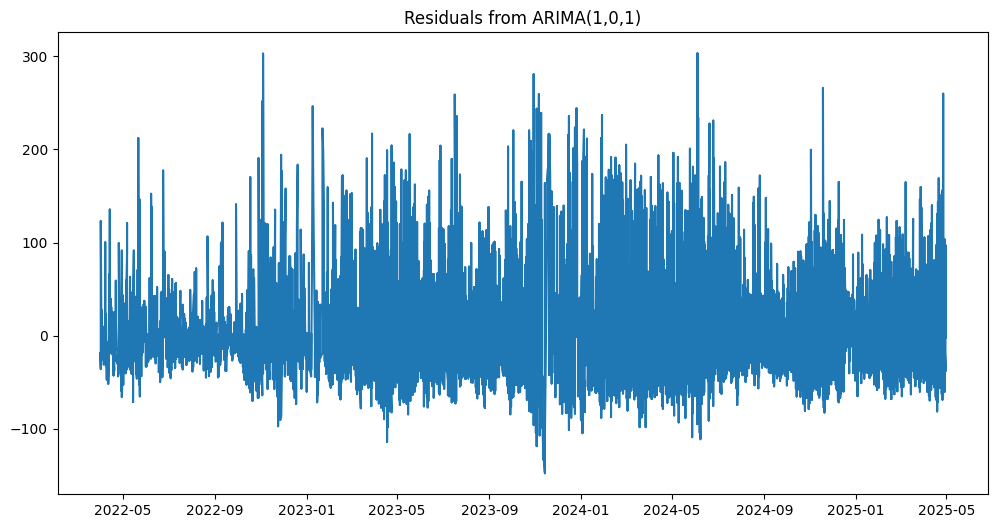

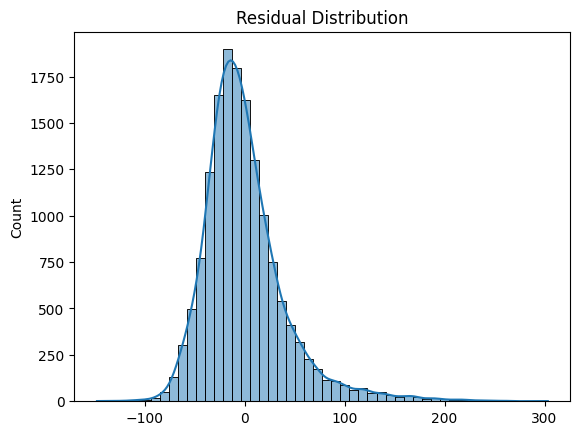

In [33]:
#Plot residuals over time
residuals = results_ar_ma.resid
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title("Residuals from ARIMA(1,0,1)")
plt.show()

sns.histplot(residuals, bins=50, kde=True)
plt.title("Residual Distribution")
plt.show()

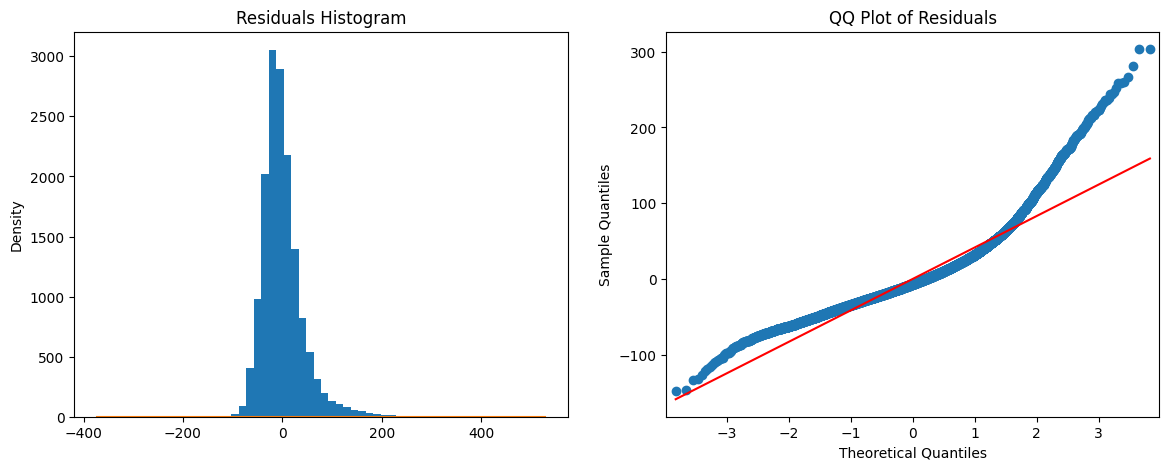

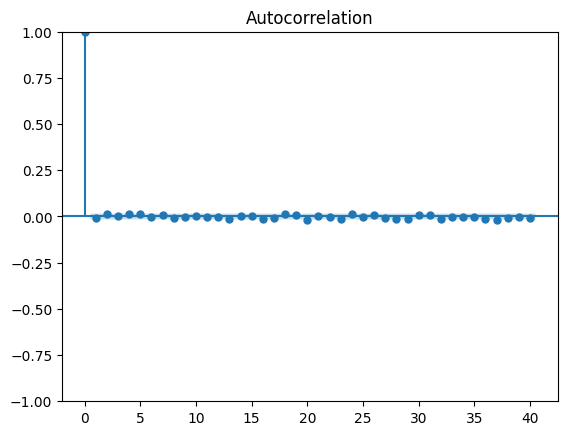

In [34]:
# Residual diagnostics
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Histogram + KDE
residuals.plot(kind='hist', bins=30, ax=ax[0], title="Residuals Histogram")
residuals.plot(kind='kde', ax=ax[0])

# QQ-plot
sm.qqplot(residuals, line='s', ax=ax[1])
plt.title("QQ Plot of Residuals")
plt.show()

# ACF plot
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

In [35]:
raj_pm10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15449 entries, 2025-04-30 to 2022-04-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   aqi_value  15449 non-null  int64
dtypes: int64(1)
memory usage: 241.4 KB


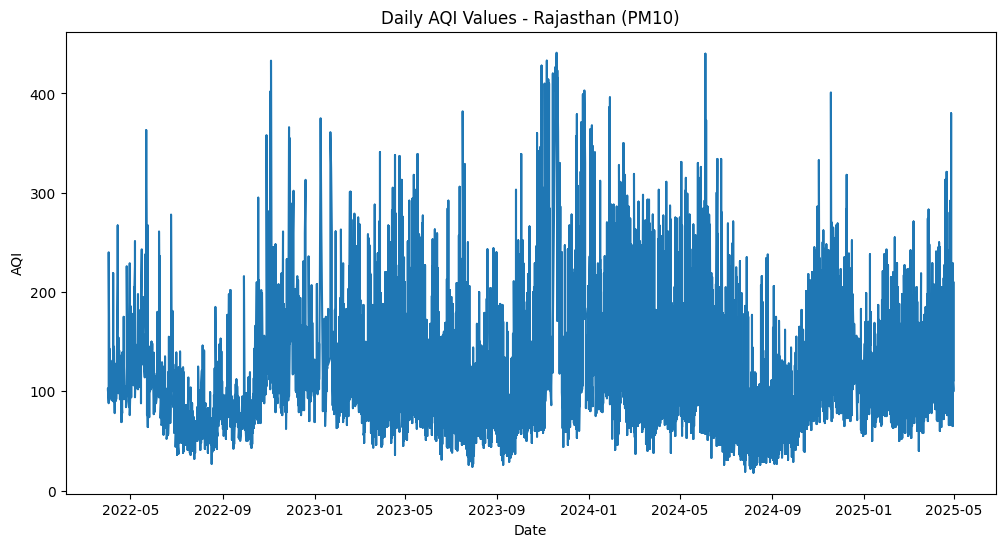

In [36]:
plt.figure(figsize=(12,6))
plt.plot(raj_pm10.index, raj_pm10["aqi_value"])
plt.title("Daily AQI Values - Rajasthan (PM10)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

# **Forecasting**

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


       Forecast_AQI   Lower_CI    Upper_CI
15449    119.049477  37.662997  200.435958
15450    119.018408  37.459421  200.577395
15451    118.987510  37.258267  200.716753
15452    118.956782  37.059500  200.854063
15453    118.926223  36.863085  200.989360
15454    118.895832  36.668988  201.122675
15455    118.865608  36.477175  201.254041
15456    118.835551  36.287612  201.383489
15457    118.805659  36.100269  201.511048
15458    118.775931  35.915112  201.636750


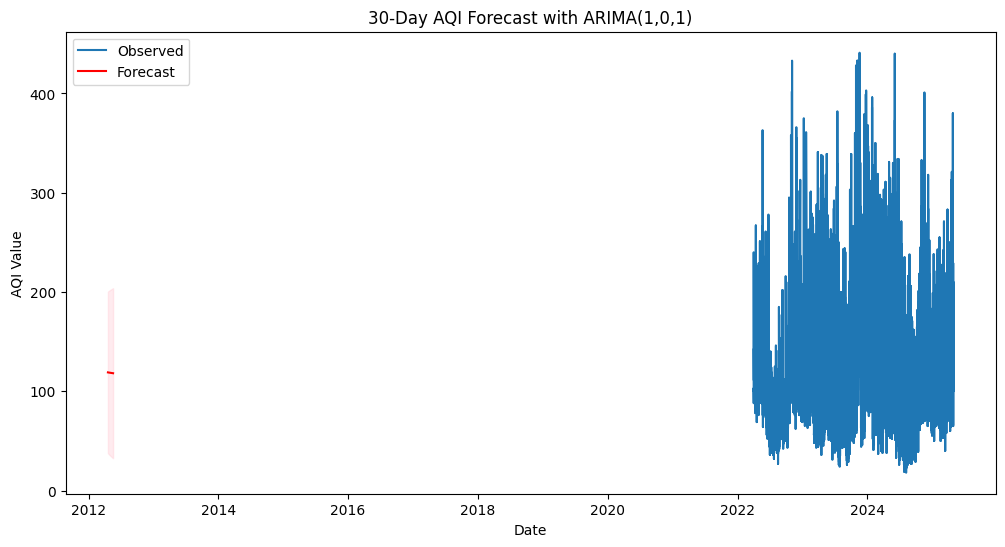

In [47]:
# Forecast next 30 days
forecast_steps = 30
forecast =results_ar_ma.get_forecast(steps=forecast_steps)

# Extract mean forecast and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Combine into a DataFrame for easy viewing/export
forecast_df = pd.DataFrame({
    "Forecast_AQI": forecast_mean,
    "Lower_CI": forecast_ci.iloc[:, 0],
    "Upper_CI": forecast_ci.iloc[:, 1]
})

# Display forecast table
print(forecast_df.head(10))  # first 10 rows

# Save to CSV
forecast_df.to_csv("aqi_forecast_30days.csv", index=True)

# Plot observed values + forecast
plt.figure(figsize=(12,6))
plt.plot(raj_pm10['aqi_value'], label="Observed")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlabel("Date")
plt.ylabel("AQI Value")
plt.title(f"{forecast_steps}-Day AQI Forecast with ARIMA(1,0,1)")
plt.legend()
plt.show()



In [48]:
import os
print(os.listdir())

['.config', 'aqi.csv', 'aqi_forecast_30days.csv', 'sample_data']


# **Project Summary**

📌 Project Summary: AQI Forecasting with ARIMA

This project applies time series forecasting techniques to Air Quality Index (AQI) data.

🔍 Data Preparation

Dataset filtered to Rajasthan (state with the highest observations).

Focused on PM10 pollutant (most dominant in the dataset).

Data was resampled to a daily series for smooth forecasting.

📊 Stationarity Check

Augmented Dickey-Fuller (ADF) test statistic = -3.46, p-value < 0.01.

Conclusion: Series is stationary, differencing not required (d = 0).

🤖 Model Building

ARIMA(1,0,0) and ARIMA(1,0,1) were compared.

ARIMA(1,0,1) outperformed ARIMA(1,0,0) with a lower AIC/BIC.

Residuals analysis showed no major autocorrelation left → model is well-fitted.

📈 Forecasting Results

A 10-step forecast predicted AQI stabilizing around 119.

Confidence intervals showed natural uncertainty widening with time.

Extended 100-step forecast clearly separated historical vs future predictions.

Forecast suggests AQI will likely remain in the Satisfactory–Moderate range unless external shocks (e.g., pollution spikes) occur.

✅ Key Insights

AQI values in Rajasthan follow a repeating cyclical pattern.

ARIMA provides reliable short-term forecasts but may be limited for long seasonal cycles.

Forecasting is useful for policy planning, health advisories, and pollution control measures.

🚀 Next Steps

Upgrade to SARIMA/SARIMAX to model seasonality explicitly.

Compare with machine learning models (XGBoost, LSTM) for long-term performance.

Deploy forecasting results in a dashboard or API service for real-time monitoring.